In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('C:/Users/acer/Documents/Project 1/training.csv')
data.head()

,target,sumber,title
0,Akhlaq,muslim.or.id,jika berfoto bersama suami
1,Akhlaq,muslim.or.id,Persahabatan yang Sampai ke Surga Selamanya
2,Akhlaq,muslim.or.id,"Tanah Tandus Tanpa Pohon, tapi Banyak Buah"
3,Akhlaq,muslim.or.id,Inti Pendidikan Anak adalah Menjauhkan dari Te...
4,Akhlaq,muslim.or.id,Berbohong kepada Suami atau kepada Istri yang ...


In [4]:
data['target_id'] = data['target'].factorize()[0]
data.head()

,target,sumber,title,target_id
0,Akhlaq,muslim.or.id,jika berfoto bersama suami,0
1,Akhlaq,muslim.or.id,Persahabatan yang Sampai ke Surga Selamanya,0
2,Akhlaq,muslim.or.id,"Tanah Tandus Tanpa Pohon, tapi Banyak Buah",0
3,Akhlaq,muslim.or.id,Inti Pendidikan Anak adalah Menjauhkan dari Te...,0
4,Akhlaq,muslim.or.id,Berbohong kepada Suami atau kepada Istri yang ...,0


In [5]:
target_id_data = data[['target', 'target_id']].drop_duplicates().sort_values('target_id')
target_id_data

,target,target_id
0,Akhlaq,0
783,Aqidah,1
1992,Berita,2
2996,Fiqih,3
3783,Gaya Hidup,4
4194,Hubungan,5
4804,Tarikh,6
5542,Ekonomi Bisnis,7


In [6]:
target_to_id = dict(target_id_data.values)
target_to_id

{'Akhlaq': 0,
 'Aqidah': 1,
 'Berita': 2,
 'Ekonomi Bisnis': 7,
 'Fiqih': 3,
 'Gaya Hidup': 4,
 'Hubungan': 5,
 'Tarikh': 6}

In [7]:
id_to_target = dict(target_id_data[['target_id', 'target']].values)
id_to_target

{0: 'Akhlaq',
 1: 'Aqidah',
 2: 'Berita',
 3: 'Fiqih',
 4: 'Gaya Hidup',
 5: 'Hubungan',
 6: 'Tarikh',
 7: 'Ekonomi Bisnis'}

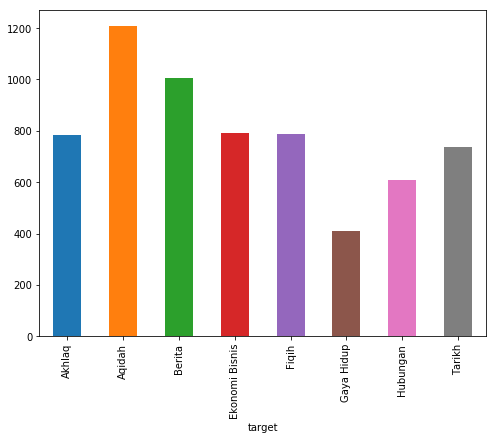

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('target').title.count().plot.bar(ylim=0)
plt.show()

In [10]:
import requests
def stopwords():
    r = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text
    data = []
    for x in r.split("\n"):
        data.append(x)
    return data

In [39]:
tfidf1 = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_words)
features = tfidf1.fit_transform(data_shuffle.title).toarray()
labels = data_shuffle.target_id
features.shape

(6333, 1776)

In [22]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
labels

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6303    7
6304    7
6305    7
6306    7
6307    7
6308    7
6309    7
6310    7
6311    7
6312    7
6313    7
6314    7
6315    7
6316    7
6317    7
6318    7
6319    7
6320    7
6321    7
6322    7
6323    7
6324    7
6325    7
6326    7
6327    7
6328    7
6329    7
6330    7
6331    7
6332    7
Name: target_id, Length: 6333, dtype: int64

In [14]:
stop_words = stopwords()

In [15]:
stop_words

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [30]:
from sklearn.utils import shuffle
data_shuffle = shuffle(data)

In [31]:
data_shuffle

,target,sumber,title,target_id
5813,Ekonomi Bisnis,sharianews.com,Sukuk Negara Penting bagi Kemaslahatan Bangsa,7
185,Akhlaq,muslim.or.id,"Keadaan Susah atau Stres, Tetap Perhatikan Keb...",0
5878,Ekonomi Bisnis,sharianews.com,"Sebagai Ikon, Bank Muamalat Berperan Membangun...",7
4862,Tarikh,islampos.com,"Wahai Penggembala, Aku Mau Beli 1 dari Dombamu",6
3773,Fiqih,rumaysho.com,"Sifat Shalat Nabi (26): Di Tasyahud Akhir, Nab...",3
1898,Aqidah,rumaysho.com,Mengapa Kita Harus Mengenal Rasul?,1
2211,Berita,hidayatullah.com,Silaturahim Dubes Saudi Dr Yahya Alqahtani di ...,2
2636,Berita,hidayatullah.com,"Kebakaran Hutan di New Zealand, 3.000 Orang Me...",2
6170,Ekonomi Bisnis,sharianews.com,JK Dorong Pengumpulan Zakat melalui Kepercayaa...,7
4167,Gaya Hidup,sharianews.com,Agenda Milenial Menyambut Tahun Baru 2019 Masehi,4


In [34]:
X = data_shuffle['title']
Y = data_shuffle['target']
split_ = int(0.8 * len(X))
X_train = X[:split_]
X_test = X[split_:]

Y_train = Y[:split_]
Y_test = Y[split_:]

In [35]:
len(X_train)

5066

In [17]:
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__max_features': (5000, 10000, 20000),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__estimator__alpha': (1e-2, 1e-3)
}

In [36]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train,Y_train)

print()
print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   11.2s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:   23.5s finished



Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=20000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan',...'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
          n_jobs=1))]


In [38]:
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(X_test)

print(classification_report(Y_test, predictions, target_names=data['target'].unique()))

                precision    recall  f1-score   support

        Akhlaq       0.68      0.61      0.64       151
        Aqidah       0.81      0.84      0.83       273
        Berita       0.82      0.83      0.82       192
         Fiqih       0.84      0.90      0.87       162
    Gaya Hidup       0.74      0.77      0.76       154
      Hubungan       0.58      0.57      0.58        74
        Tarikh       0.72      0.71      0.71       113
Ekonomi Bisnis       0.76      0.72      0.74       148

   avg / total       0.77      0.77      0.77      1267



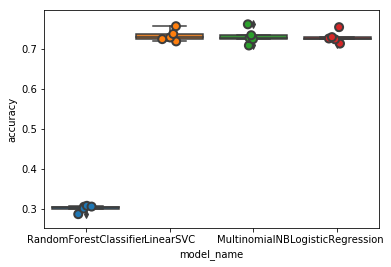

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [41]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.732536
LogisticRegression        0.728747
MultinomialNB             0.730491
RandomForestClassifier    0.300343
Name: accuracy, dtype: float64

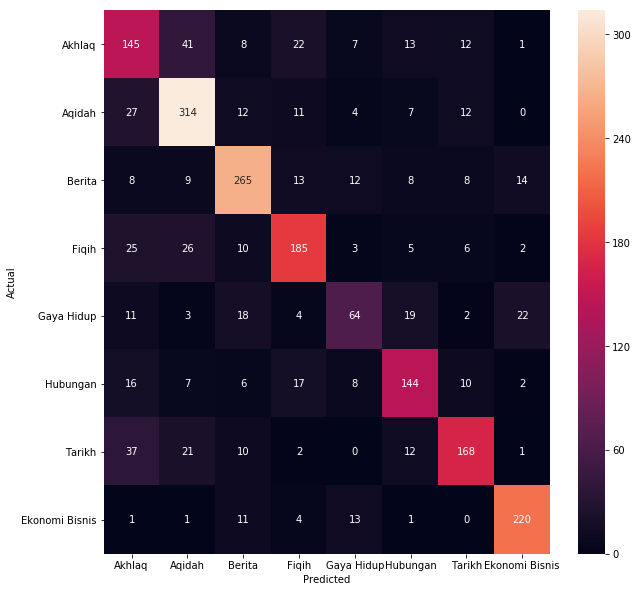

In [44]:
from sklearn.model_selection import train_test_split
model = LinearSVC()
X_trainSVC, X_testSVC, y_trainSVC, y_testSVC, indices_trainSVC, indices_testSVC = train_test_split(features, labels, data_shuffle.index, test_size=0.33, random_state=0)
modelSVC.fit(X_trainSVC, y_trainSVC)
y_predSVC = modelSVC.predict(X_testSVC)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_testSVC, y_predSVC)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=target_id_data.target.values, yticklabels=target_id_data.target.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
print(classification_report(y_testSVC, y_predSVC, target_names=data_shuffle['target'].unique()))

                precision    recall  f1-score   support

Ekonomi Bisnis       0.54      0.58      0.56       249
        Akhlaq       0.74      0.81      0.78       387
        Tarikh       0.78      0.79      0.78       337
         Fiqih       0.72      0.71      0.71       262
        Aqidah       0.58      0.45      0.50       143
        Berita       0.69      0.69      0.69       210
    Gaya Hidup       0.77      0.67      0.72       251
      Hubungan       0.84      0.88      0.86       251

   avg / total       0.72      0.72      0.72      2090



In [48]:
modelSVC.fit(features, labels)
N = 2
for target, target_id in sorted(target_to_id.items()):
  indices = np.argsort(modelSVC.coef_[target_id])
  feature_names = np.array(tfidf1.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(target))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Akhlaq':
  . Top unigrams:
       . akhlak
       . nasehat
  . Top bigrams:
       . ilmu syar
       . pintu kebaikan
# 'Aqidah':
  . Top unigrams:
       . tauhid
       . syirik
  . Top bigrams:
       . orang mati
       . rukun islam
# 'Berita':
  . Top unigrams:
       . jokowi
       . prabowo
  . Top bigrams:
       . wali kota
       . kaum milenial
# 'Ekonomi Bisnis':
  . Top unigrams:
       . syariah
       . sukuk
  . Top bigrams:
       . pasar modal
       . dana haji
# 'Fiqih':
  . Top unigrams:
       . wudhu
       . najis
  . Top bigrams:
       . muslim bag
       . shalat nabi
# 'Gaya Hidup':
  . Top unigrams:
       . rajab
       . fashion
  . Top bigrams:
       . halal haram
       . halal dunia
# 'Hubungan':
  . Top unigrams:
       . pernikahan
       . jima
  . Top bigrams:
       . malam jumat
       . orang tua
# 'Tarikh':
  . Top unigrams:
       . rasulullah
       . umar
  . Top bigrams:
       . nabi sulaiman
       . masuk islam


In [49]:
import pickle
model_multinomNB = best_clf
pickle.dump(model_multinomNB, open('C:/Users/acer/Documents/Project 1/model_multinomNB.pkl','wb'))
pickle.dump(modelSVC, open('C:/Users/acer/Documents/Project 1/modelSVC.pkl','wb'))

In [50]:
loadedMNB = pickle.load(open('C:/Users/acer/Documents/Project 1/model_multinomNB.pkl','rb'))

In [51]:
predictions = loadedMNB.predict(X_test)

print(classification_report(Y_test, predictions, target_names=data['target'].unique()))

                precision    recall  f1-score   support

        Akhlaq       0.68      0.61      0.64       151
        Aqidah       0.81      0.84      0.83       273
        Berita       0.82      0.83      0.82       192
         Fiqih       0.84      0.90      0.87       162
    Gaya Hidup       0.74      0.77      0.76       154
      Hubungan       0.58      0.57      0.58        74
        Tarikh       0.72      0.71      0.71       113
Ekonomi Bisnis       0.76      0.72      0.74       148

   avg / total       0.77      0.77      0.77      1267

